# Numerical Method

### 1-D Heat Conduction
Numerical modeling is a process to solve mathematical equation when it is difficult to solve analytically.

1. Mathematical Models from Physical Laws\
    Geophysical problems (like heat flow in the Earth) can be described using mathematical equations derived from conservation laws (like conservation of energy). These equations are often partial differential equations (PDEs) because they involve rates of change in space and time.

    In this notebook we would try to solve the heat diffusion equation for a static medium. The heat diffusion equation models how temperature changes over time in a material. It's derived from the thermal energy balance — i.e., how much heat enters, leaves, and is generated within a volume.

    So this equation states:
    Heat in + Change in internal energy = Heat produced internally

\begin{align*}
\int_{V} \rho c_p \frac{\partial T}{\partial t} dV = - \int_{\partial_{V}}  \bold{q} \cdot \bold{n} dA + \int_{V} \rho H dV
\end{align*}

where 
- $\bold{q} \cdot \bold{n}$ : heatflow density across
- $\partial V$ : the boundary surface
- $V$ : volume
- $\rho$ : density
- $c_p$ : specific heat at constant pressure
- $\rho H$ : volumetric density of the internal heat production rate 
- $H$ : heating rate per unit mass
- $T$ : temperature

2. Solving the Model: Analytical Solutions\
    These PDEs can sometimes be solved analytically (i.e., exactly, using math formulas). A classic method is to use Fourier series, especially for simple setups.

    Example: Cooling Layer with Fixed Boundary Temperatures. This is a classic problem in geophysics and heat transfer. Imagine a layer of rock where:

    - The top and bottom boundaries are kept at zero temperature (cooling from the outside).
    - You want to find how the temperature inside changes over time.

    Fourier series solution for the initial value problem for a cooling layer where the bottom and top are kept at fixed zero temperature,

\begin{align*}
T(z,t) = \sigma \sum_{n=1}^{\infty} A_n sin(n \pi z / d) exp{(-(n \pi /d)^2 \kappa t)}
\end{align*}

\begin{align*}
A_n = 2/d \int_0^d T(z, 0) sin(n \pi z / d) dz
\end{align*}

where:
- $z$ : depth.
- $t$ : time.
- $d$ : the total depth.
- $kappa$ : thermal diffusivity.
- $A_n$ : coefficients that depend on the initial temperature distribution.


3. Numerically Solve the Equation\
    Time dependent heat equation

\begin{align*}
\rho c_p \frac{\partial T}{\partial t} = \nabla \cdot k \nabla T + \rho H
\end{align*}

where:
- $T$ : temperature
- $k$ : thermal conductivity
- $\rho$ : mass density
- $c_p$ : specific heat at constant pressure

    Assume a steady state temperature distribution $\frac{\partial T}{\partial t} = 0$ and neglect horizontal diffusion of heat, we obtain a time dependent equation with the lithospheric age as the time variable.

\begin{align*}
\rho c_p \frac{\partial T}{\partial t} = \frac{\partial}{\partial z} k \frac{\partial T}{\partial z} + \rho H
\end{align*}


4. The Oceanic Lithosphere Example\
    Consider a moving lithospheric plate cooling as it spreads. This introduces advection and requires a moving reference frame. This is the advection term:

    The advection term is given by
\begin{align*}
\frac{dT}{dt} = \frac{\partial}{\partial t} + u \frac{\partial}{\partial x}
\end{align*}

    is simplified by substituting:
\begin{align*}
t = \frac{x}{u}
\end{align*}

    Assuming:
    - steady state $\partial T / \partial t = 0$
    - neglecting lateral (horizontal) diffusion $\partial ^2 T / \partial x^2 = 0$

    Then 1D transient heat equation in the vertical direction:

\begin{align*}
\rho c_p \frac{\partial T}{\partial t} = \frac{\partial}{\partial z} k \frac{\partial T}{\partial z} + H
\end{align*} \\

where $t$ is lithospheric age, i.e., how long the material has been cooling

5. Initial and Boundary Conditions
    Initial condition (when $t = 0$)
\begin{align*}
T(z, 0) = T_I(z)
\end{align*}
    Types of boundary condition:
    - Dirichlet: fixes the temperature at a boundary
\begin{align*}
T(z_b, t)=T_b(t)
\end{align*}
    - Neumann: specifies the heat flux (i.e., derivative of temperature)
\begin{align*}
k \frac{\partial T(z_b, t)}{\partial z} = q_b(t)
\end{align*}

## Solving 1D Heat Equation
1D transient heat equation in the vertical direction:

\begin{align*}
\rho c_p \frac{\partial T}{\partial t} = \frac{\partial}{\partial z} k \frac{\partial T}{\partial z} + H
\end{align*}

Assumptions:
- consatant $\rho$ and $c_p$
- variable constant $k(z)$
- Dirichlet boundary condition $T(z=0, t) = T_0, T(z=L, t) = T_L$
- uniform grid in $z$
- forward Euler in time

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Discretize ths PDE (1D heat equation)
1. Spatial Grid
we can assume our 1D model is uniformly spaced. Imagine our model is line with size L and grid spacing dz. Our model would be devided into N nodes with index nodes defined by $i \in {0,1,...,N-1}$.

2. Time Derivative (LHS)
Using forward Euler method we can discritize the left hand side of the 1D heat equation into this form

\begin{align*}
\rho c_p \frac{\partial T}{\partial t} \approx \rho c_p \frac{(T_i)^{n+1} - (T_i)^n}{\Delta t}
\end{align*}

where $\Delta t$ is the time step, and $(T_i)^n$ is the temperature at node $i$ at time step $n$.

3. Spatial Derivative (RHS): Diffusion Term
We need to discretize the right hand side equation, which given by this form

\begin{align*}
\frac{\partial}{\partial z}(k(z) \frac{\partial T}{\partial z}) \approx \frac{1}{\Delta z} [k_{i+1/2} \frac{(T_{i+1})^n - (T_i)}{\Delta z} - k_{i-1/2} \frac{T_i - T_{i-1}}{\Delta z}]
\end{align*}

4. Source Term
Add internal heating at node:
\begin{align*}
H(z) -> H_i
\end{align*}

Full discretized equation
\begin{align*}
(T_i)^{n+1} = (T_i)^n + \frac{\Delta t}{\rho c_p} (\frac{1}{\Delta z^2} [k_{i+1/2}((T_{i+1})^n - (T_i)^n) - k_{i-1/2} ((T_i)^n)-(T_{i-1})^n] + H_i)
\end{align*}
### Forward Euler Method

First order ODE

\begin{align*}
\frac{dy}{dt} = f(t, y)\\
y(t_0) = y_0
\end{align*}

\begin{align*}
y_(n+1) = y_n + h f(t_n, y_n)
\end{align*}

where:
- $h$ is the time step

In [ ]:
# Physical parameters
rho = 2800 # kg/m^3 (igneous rock density (2500 - 2900 kg/m^3))
cp = 1000 # J/(kg K) (specific heat at constant pressure)
k = 3.0 # W/(m K) (thermal conductivity)
H = 1e-6 # W/m^3

# Domain
L = 200 # Depth of 100 m
Nz = 101 # Number of grid points
dz = L/(Nz-1)
z = np.linspace(0, L, Nz)

# Time stepping
# alpha = k / (rho * cp)
# CFL condition dt <= 0.5*dz**2/alpha
# dt less than 1.867 * 10^6
dt = 1e6 # time step in seconds
nt = 500 # number of time steps

# Initial condition
T = np.ones(Nz) * 1300 # initial temperature in the mantle

# Boundary conditions (Dirichlet)
T_top = 0 # top temperature (°C)
T_bottom = 1300 # bottom temperature (°C)

T[0] = T_top
T[-1] = T_bottom

In [85]:
# Precompute constants
alpha = k / (rho * cp)   # thermal diffusivity

# Store results for plotting
T_all = [T.copy()]

for n in range(nt):
    T_new = T.copy()
    for i in range(1, Nz - 1):
        d2Tdz2 = (T[i+1] - 2*T[i] + T[i-1]) / dz**2
        T_new[i] = T[i] + dt * (alpha * d2Tdz2 + H / (rho * cp))
    
    # Enforce Dirichlet BCs
    T_new[0] = T_top
    T_new[-1] = T_bottom
    
    T = T_new
    if n % 50 == 0:
        T_all.append(T.copy())


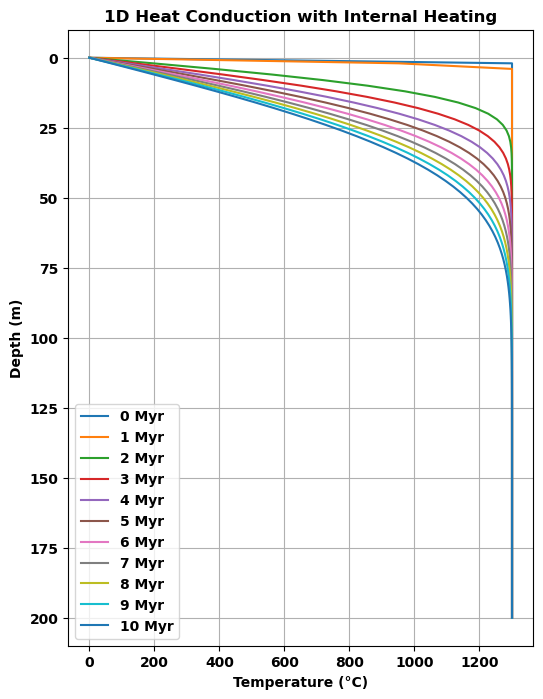

In [86]:
plt.figure(figsize=(6, 8))
for i, T_snap in enumerate(T_all):
    plt.plot(T_snap, z, label=f'{i*dt/1e6:.0f} Myr')
    
plt.gca().invert_yaxis()
plt.xlabel("Temperature (°C)")
plt.ylabel("Depth (m)")
plt.title("1D Heat Conduction with Internal Heating")
plt.legend()
plt.grid()
plt.show()


##### Result
The plot presents the 1D transient heat conduction through the Earth's crust with internal heating, over time, from the surface down to 200 meters depth.

The simulation includes both thermal diffusion and internal heat production. The thermal diffusion is the heat flowing from hot to cold regions, and internal heat poduction is the heat coming from the rock itself (e.g., from radioactive decay).

Each curve represents the temperature profile with depth at a given geological time starts from 0 up to 10 Myr (million years). Over time, the system moves toward a thermal steady state. Which means the temperature no longer changes with time at any point in the system.